In [1]:
import seaborn as sns
import os
import pickle
import matplotlib.pyplot as plt
import random
import matplotlib.pyplot as plt #repeat?
import seaborn as sns #repeat?
import matplotlib.gridspec as gridspec
import pandas as pd 
from scipy.stats import ttest_rel
import numpy as np
from sklearn import metrics
from analysis import *
%matplotlib inline 
import math

In [2]:
# load data
sub_data = halfsies(mass_data('../../data'))

pres = mass_df(halfsies(sub_data), typ='pres')
rec = mass_df(halfsies(sub_data), typ='rec')

In [3]:
# rec[rec.isnull().any().any()].groupby['subject','familiarity'].count()['images']

In [4]:
#pres = mass_df(mass_data('../../data'), typ='pres')
#rec = mass_df(mass_data('../../data'), typ='rec')

In [5]:
pres.head()

,cue_tuples,cued,uncued
0,"(cue_R, L, 0)",26437107.thl_sunaydywdmvlfddbxbk.jpg,22827276.thl_sunaaiqiqcggrskoqgy.jpg
1,"(cue_R, L, 1)",26426575.thl_sunajwqkfsykceonyig.jpg,26424075.thl_sunaipyohrqlwngaqif.jpg
2,"(cue_R, L, 0)",26378596.thl_sunaenwuebvlpdmntju.jpg,23014927.thl_sunabkmdplkdbvxriff.jpg
3,"(cue_R, L, 0)",26373407.thl_sunacycdoztxoluxjyk.jpg,26379054.thl_sunaeouogqolxvggaoq.jpg
4,"(cue_R, L, 0)",26427867.thl_sunakodkcslgqhqlgwl.jpg,22923068.thl_sunabcfpwlpolnutyju.jpg


In [6]:
rec.head()

,familiarity,images,cued_cat,location,cat,category,attention level,report familiar
0,1.0,26377133.thl.jpg,L,attended,F,unattended,side,no
1,3.0,26427867.thl.jpg,L,attended,F,unattended,side,yes
2,2.0,22923440.thl.jpg,novel,novel,F,novel,novel,no
3,NaN,26465824.thl.jpg,novel,novel,F,novel,novel,yes
4,1.0,26424075.thl.jpg,L,unattended,F,unattended,none,no


In [7]:
# add subject numbers
subs1 = [[x]*80 for x in range(len(sub_data))]
flat_subs1 = [val for sublist in subs1 for val in sublist]
pres['subject'] = pd.Series(flat_subs1)

subs2 = [[x, x, x, x]*80 for x in range(len(sub_data))]
flat_subs2 = [val for sublist in subs2 for val in sublist]
rec['subject'] = pd.Series(flat_subs2) #CHECK TO SEE IF SUBJECT NUMBERS ARE CORRECTLY MATCHED WITH IMAGES!!!

# organize RT's
# pres['is_cued_RT'] = pres.apply(lambda row: pr(row),axis=1)  
# pres = arrange_RTs(pres,sub_data)
# pres['is_valid'] = pres.apply(lambda row: is_valid(row),axis=1)

In [8]:
pres.head()

,cue_tuples,cued,uncued,subject
0,"(cue_R, L, 0)",26437107.thl_sunaydywdmvlfddbxbk.jpg,22827276.thl_sunaaiqiqcggrskoqgy.jpg,0
1,"(cue_R, L, 1)",26426575.thl_sunajwqkfsykceonyig.jpg,26424075.thl_sunaipyohrqlwngaqif.jpg,0
2,"(cue_R, L, 0)",26378596.thl_sunaenwuebvlpdmntju.jpg,23014927.thl_sunabkmdplkdbvxriff.jpg,0
3,"(cue_R, L, 0)",26373407.thl_sunacycdoztxoluxjyk.jpg,26379054.thl_sunaeouogqolxvggaoq.jpg,0
4,"(cue_R, L, 0)",26427867.thl_sunakodkcslgqhqlgwl.jpg,22923068.thl_sunabcfpwlpolnutyju.jpg,0


In [9]:
# check im counts (20 for all attention levels, aside from Novel)
# need also to check side split (10's and 40)

# rec.groupby(['cat', 'attention level','subject']).count()['images']

In [10]:
rec.head()

,familiarity,images,cued_cat,location,cat,category,attention level,report familiar,subject
0,1.0,26377133.thl.jpg,L,attended,F,unattended,side,no,0
1,3.0,26427867.thl.jpg,L,attended,F,unattended,side,yes,0
2,2.0,22923440.thl.jpg,novel,novel,F,novel,novel,no,0
3,NaN,26465824.thl.jpg,novel,novel,F,novel,novel,yes,0
4,1.0,26424075.thl.jpg,L,unattended,F,unattended,none,no,0




Raw number of trials, HIGHEST attn level ranked 3 or 4



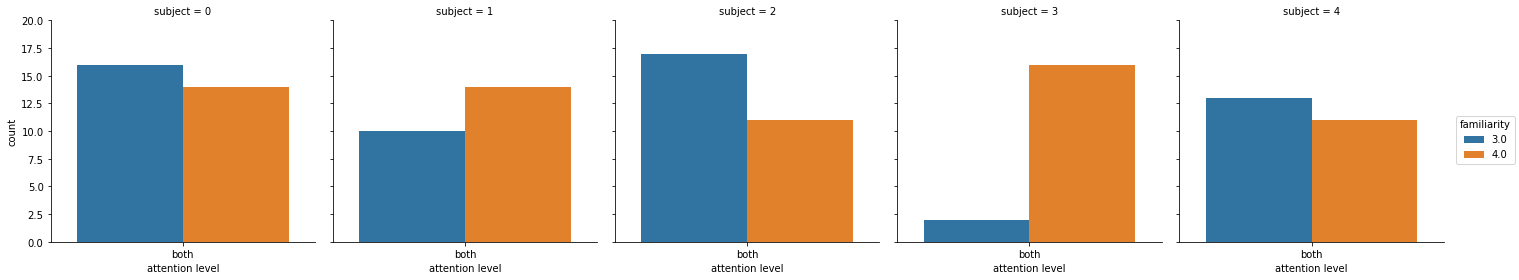

In [11]:
g = sns.factorplot(col='subject', x='attention level', hue='familiarity', data=rec[(rec['attention level']=='both')&(rec['familiarity']>2.0)], kind='count') 
plt.ylim(0, 20)

print('')
print('')
print('Raw number of trials, HIGHEST attn level ranked 3 or 4')
print('')



Raw number of trials, LOWEST attn level ranked 1 or 2



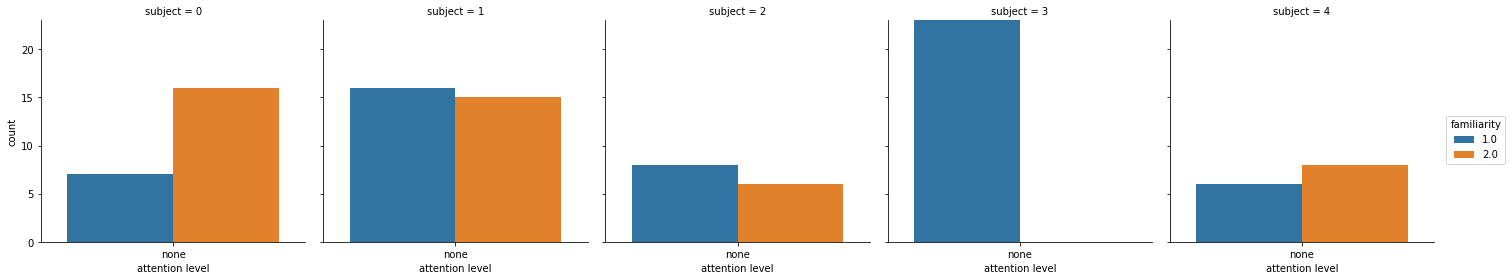

In [12]:
g = sns.factorplot(col='subject', x='attention level', hue='familiarity', data=rec[(rec['attention level']=='none')&(rec['familiarity']<3.0)], kind='count') 
plt.ylim(0, 23)

print('')
print('')
print('Raw number of trials, LOWEST attn level ranked 1 or 2')
print('')

In [13]:
ROC_data(rec[rec['subject']==0]).keys()

dict_keys(['both', 'none', 'novel', 'side', 'category'])

{'both': [0, 0.05, 0.2, 0.6, 0.95, 1], 'none': [0, 0.175, 0.575, 0.875, 1.0, 1], 'novel': [0, 0.11875, 0.44375, 0.8875, 0.95, 1], 'side': [0, 0.125, 0.275, 0.75, 0.95, 1], 'category': [0, 0.05, 0.25, 0.775, 1.0, 1]}

{'both': [0, 0.05, 0.2, 0.6, 0.95, 1], 'none': [0, 0.175, 0.575, 0.875, 1.0, 1], 'novel': [0, 0.11875, 0.44375, 0.8875, 0.95, 1], 'side': [0, 0.125, 0.275, 0.75, 0.95, 1], 'category': [0, 0.05, 0.25, 0.775, 1.0, 1]}

{'both': [0, 0.05, 0.2, 0.6, 0.95, 1], 'none': [0, 0.175, 0.575, 0.875, 1.0, 1], 'novel': [0, 0.11875, 0.44375, 0.8875, 0.95, 1], 'side': [0, 0.125, 0.275, 0.75, 0.95, 1], 'category': [0, 0.05, 0.25, 0.775, 1.0, 1]}

{'both': [0, 0.05, 0.2, 0.6, 0.95, 1], 'none': [0, 0.175, 0.575, 0.875, 1.0, 1], 'novel': [0, 0.11875, 0.44375, 0.8875, 0.95, 1], 'side': [0, 0.125, 0.275, 0.75, 0.95, 1], 'category': [0, 0.05, 0.25, 0.775, 1.0, 1]}

{'both': [0, 0.05, 0.2, 0.6, 0.95, 1], 'none': [0, 0.175, 0.575, 0.875, 1.0, 1], 'novel': [0, 0.11875, 0.44375, 0.8875, 0.95, 1], 's

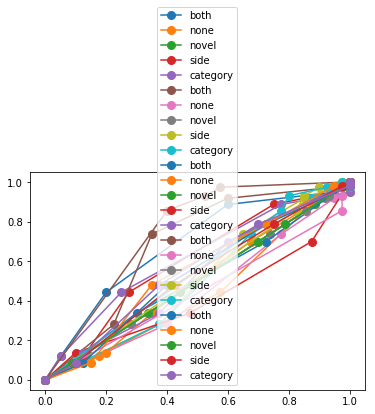

In [14]:
for x in range(5):
# for each sub

    data = ROC_data(rec[rec['subject']==x])
    # ROC vals by attn level        
                    
    for key in data.keys():
    # for each key
        
        plt.plot(data[key], data['novel'], '-o', label=key, markersize=8)
        print(data)
        print()
        plt.legend() 
plt.show()

OBJECT IMAGES


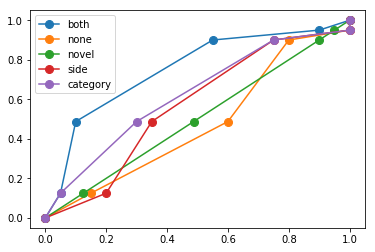

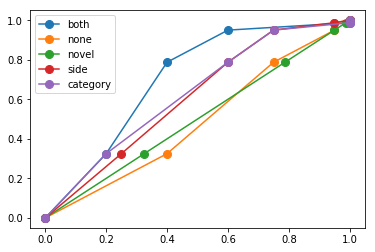

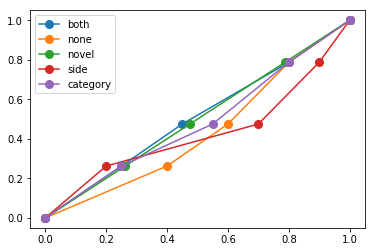

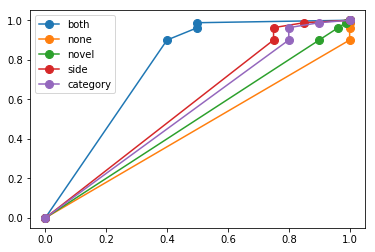

In [15]:
print("OBJECT IMAGES")

for x in range(4):
# for each sub

    data = ROC_data(rec[(rec['subject']==x) & (rec['cat']=='F')])
    # ROC vals by attn level        
                    
    for key in data.keys():
    # for each key
        
        plt.plot(data[key], data['novel'], '-o', label=key, markersize=8)
    
    plt.legend() 
    plt.show()

PLACE IMAGES


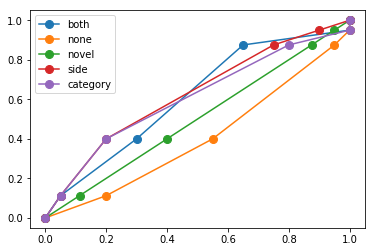

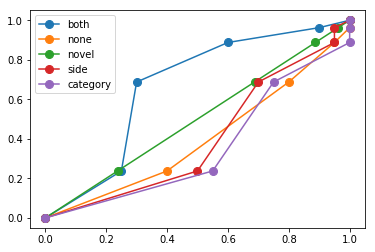

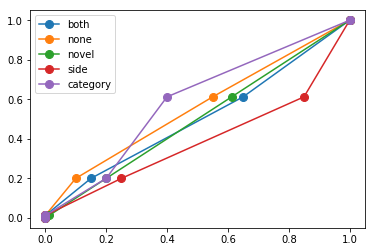

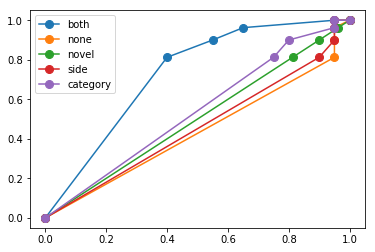

In [16]:
print("PLACE IMAGES")

for x in range(4):
# for each sub

    data = ROC_data(rec[(rec['subject']==x) & (rec['cat']=='L')])
    # ROC vals by attn level        
                    
    for key in data.keys():
    # for each key
        
        plt.plot(data[key], data['novel'], '-o', label=key, markersize=8)
    
    plt.legend() 
    plt.show()

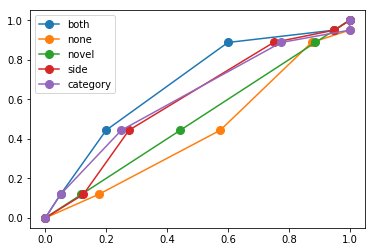

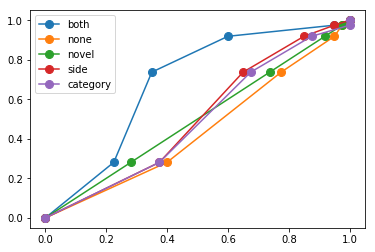

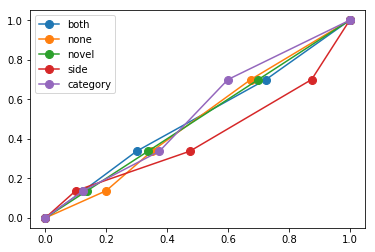

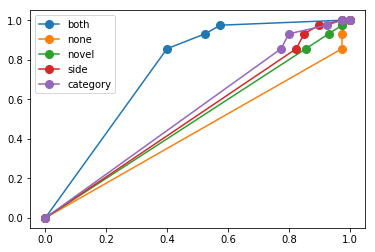

In [17]:
for x in range(4):
# for each sub

    data = ROC_data(rec[rec['subject']==x])
    # ROC vals by attn level        
                    
    for key in data.keys():
    # for each key
        
        plt.plot(data[key], data['novel'], '-o', label=key, markersize=8)
        
    plt.legend() 
    plt.show()


In [19]:
means = pd.DataFrame(pres.groupby(['subject', 'is_valid'])['RT'].mean())
means = means.reset_index()

sns.boxplot(x = "is_valid", y = "RT", data = means)
plt.savefig('../../figs/box_means.pdf')
ttest_rel(means[means['is_valid']=='valid']['RT'], means[means['is_valid']=='invalid']['RT'])

KeyError: 'is_valid'

In [20]:
medians = pd.DataFrame(pres.groupby(['subject', 'is_valid'])['RT'].median())
medians = medians.reset_index()

sns.boxplot(x = "is_valid", y = "RT", data = medians)
plt.savefig('../../figs/box_medians.pdf')

ttest_rel(medians[medians['is_valid']=='valid']['RT'], medians[medians['is_valid']=='invalid']['RT'])
#ttest_rel(medians[medians['is_valid']=='invalid']['RT'], medians[medians['is_valid']=='valid']['RT'])

KeyError: 'is_valid'

In [21]:
avg_rating = pd.DataFrame(rec.groupby(['subject', 'attention level'])['familiarity'].mean())
avg_rating = avg_rating.reset_index()

labels = avg_rating['attention level'].unique()

#for f in ['F','L']:
f = ' '

for idx,l in enumerate(labels):
    for each in [z for z in labels]:
        gr1 = avg_rating[(avg_rating['attention level']==l)]['familiarity'] #& (avg_rating['cat']==f)]['familiarity']
        gr2 = avg_rating[(avg_rating['attention level'] == each)]['familiarity'] #& (avg_rating['cat']==f)]['familiarity']

        t = ttest_rel(gr1,gr2)

        if t[1]<.05:
        

            print(f + ': '+l + ' vs ' + each)
            print('stat: '+str(t[0])[0:5]+'  p= '+ str(t[1])[0:5])
            print( ' ')      
            
    #sns.barplot(data=avg_rating, x = 'attention level', y = 'familiarity')
    
agg

 : category vs none
stat: 3.464  p= 0.025
 
 : category vs novel
stat: 2.842  p= 0.046
 
 : category vs side
stat: 2.808  p= 0.048
 
 : none vs category
stat: -3.46  p= 0.025
 
 : novel vs category
stat: -2.84  p= 0.046
 
 : side vs category
stat: -2.80  p= 0.048
 


NameError: name 'agg' is not defined

In [22]:
#count check
#rec.groupby(['subject', 'attention level']).count()

In [23]:
grouped = rec.groupby(['subject', 'attention level', 'cat'])
agg = grouped.aggregate(np.mean)
agg = agg.reset_index()

In [24]:
#sns.boxplot(x='is_valid', y='RT', data=pres)
##plt.ylim([0,2])
#plt.savefig('../../figs/box.pdf')
#ttest_rel(pres[pres['is_valid']=='valid']['RT'],pres[pres['is_valid']=='invalid']['RT'])

# ANOVA

In [25]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

anova = ols('familiarity ~ C(category) + C(location)', data=rec).fit() #Specify C for Categorical
print(sm.stats.anova_lm(anova, typ=2))

                  sum_sq      df          F        PR(>F)
C(category)    54.616737     2.0  24.249880  4.248191e-11
C(location)    49.112389     2.0  21.805945  4.563196e-10
Residual     1763.509939  1566.0        NaN           NaN


In [26]:
ROC_full=[]

for x in range(5):
    ROC_full.append(ROC_data(rec[rec['subject']==x]))
    
ROC_new_avg = {}
    
for kind in ROC_full[0].keys():
    kind_glom = [ROC_full[x][kind] for x in range(5)]
    ROC_new_avg[kind] = [sum(e)/len(e) for e in zip(*kind_glom)]

In [27]:
#ROC_new_avg

In [28]:
ROC_full_face=[]

for x in range(5):
    ROC_full_face.append(ROC_data(rec[(rec['subject']==x) & (rec['cat']=='F')]))
    
ROC_new_face = {}
    
for kind in ROC_full_face[0].keys():
    kind_glom_face = [ROC_full_face[x][kind] for x in range(5)]
    ROC_new_face[kind] = [sum(e)/len(e) for e in zip(*kind_glom_face)]

In [29]:
ROC_full_loc=[]

for x in range(5):
    ROC_full_loc.append(ROC_data(rec[(rec['subject']==x) & (rec['cat']=='L')]))
    
ROC_new_loc = {}
    
for kind in ROC_full_loc[0].keys():
    kind_glom_loc = [ROC_full_loc[x][kind] for x in range(5)]
    ROC_new_loc[kind] = [sum(e)/len(e) for e in zip(*kind_glom_loc)]

In [30]:
ROC_full

[{'both': [0, 0.05, 0.2, 0.6, 0.95, 1],
  'category': [0, 0.05, 0.25, 0.775, 1.0, 1],
  'none': [0, 0.175, 0.575, 0.875, 1.0, 1],
  'novel': [0, 0.11875, 0.44375, 0.8875, 0.95, 1],
  'side': [0, 0.125, 0.275, 0.75, 0.95, 1]},
 {'both': [0, 0.225, 0.35, 0.6, 0.95, 1],
  'category': [0, 0.375, 0.675, 0.875, 1.0, 1],
  'none': [0, 0.4, 0.775, 0.95, 0.975, 1],
  'novel': [0, 0.28125, 0.7375, 0.91875, 0.975, 1],
  'side': [0, 0.375, 0.65, 0.85, 0.95, 1]},
 {'both': [0, 0.125, 0.3, 0.725, 1.0, 1],
  'category': [0, 0.125, 0.375, 0.6, 1.0, 1],
  'none': [0, 0.2, 0.35, 0.675, 1.0, 1],
  'novel': [0, 0.1375, 0.3375, 0.7, 1.0, 1],
  'side': [0, 0.1, 0.475, 0.875, 1.0, 1]},
 {'both': [0, 0.4, 0.525, 0.575, 0.975, 1],
  'category': [0, 0.775, 0.8, 0.925, 0.975, 1],
  'none': [0, 0.975, 0.975, 0.975, 1.0, 1],
  'novel': [0, 0.85625, 0.93125, 0.975, 1.0, 1],
  'side': [0, 0.825, 0.85, 0.9, 0.975, 1]},
 {'both': [0, 0.125, 0.4, 0.725, 1.0, 1],
  'category': [0, 0.1, 0.375, 0.7, 1.0, 1],
  'none': [0,

# Plot

/usr/local/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


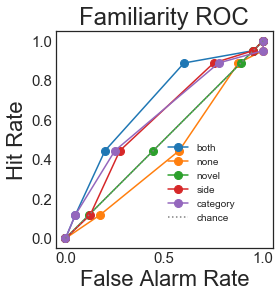

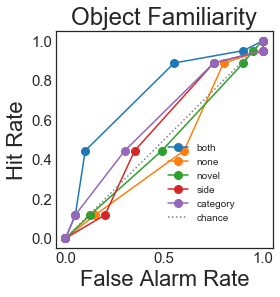

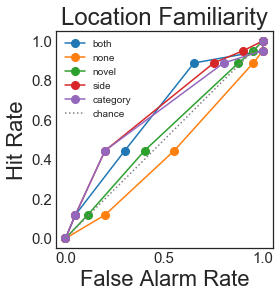

No handles with labels found to put in legend.


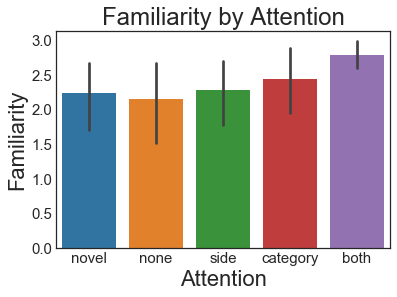

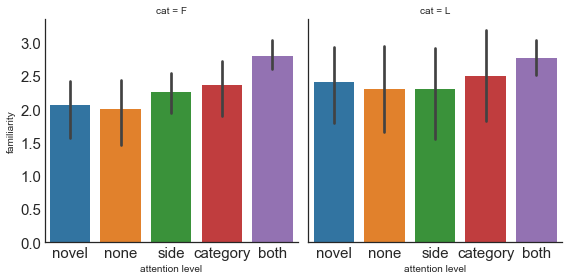

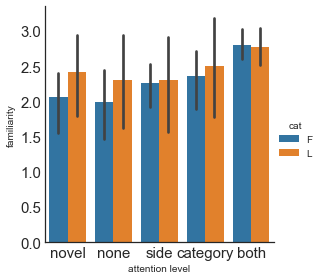

In [44]:
sns.set_style('white')
rec2 = rec.replace('novel', np.nan)

# ROC 1 ##
data = ROC_full[0]

for key in data.keys():
    plt.plot(data[key], data['novel'], '-o', label=key, markersize=8)

plt.plot([0, 0.5, 1], [0, 0.5, 1], ':',color = 'gray', label='chance')
plt.axes().set_aspect('equal')
plt.legend(loc = (.5, .1))
plt.title('Familiarity ROC', size=24)

labels = [1, 2, 3, 4]

plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15

plt.ylabel('Hit Rate', size=22)
plt.xlabel('False Alarm Rate', size=22)
#plt.savefig('../../figs/ROC.pdf')
plt.show()




# ROC 2 ##

data2 = ROC_full_face[0]
for key in data2.keys():
    plt.plot(data2[key], data['novel'], '-o', label=key, markersize=8)

plt.plot([0, 0.5, 1], [0, 0.5, 1], ':',color = 'gray', label='chance')
plt.axes().set_aspect('equal')
plt.legend(loc = (.5, .1))
plt.title('Object Familiarity', size=24)

labels = [1, 2, 3, 4]

plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15

plt.ylabel('Hit Rate', size=22)
plt.xlabel('False Alarm Rate', size=22)

save_str = '../../figs/ROC_face.pdf'
#plt.savefig(save_str)
plt.show()


# ROC 3 ##

data2 = ROC_full_loc[0]
for key in data2.keys():
    plt.plot(data2[key], data['novel'], '-o', label=key, markersize=8)

plt.plot([0, 0.5, 1], [0, 0.5, 1], ':',color = 'gray', label='chance')
plt.axes().set_aspect('equal')
plt.legend()
plt.title('Location Familiarity', size=24)

labels = [1, 2, 3, 4]

plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15

plt.ylabel('Hit Rate', size=22)
plt.xlabel('False Alarm Rate', size=22)

save_str = '../../figs/ROC_loc.pdf'
#plt.savefig(save_str)
plt.show()

    
    
    
g = sns.barplot(x='attention level', y="familiarity", data=avg_rating, order=['novel','none','side','category','both'])#, kind='bar')#, kind = 'bar', hue='location', col='cat')#, col='cat')
#plt.legend(loc = (.5, .1))
plt.title('Familiarity by Attention', size=24)

plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15

plt.ylabel('Familiarity', size=22)
plt.xlabel('Attention', size=22)
#plt.savefig('../../figs/bar.pdf')
#plt.legend()

plt.show()



g = sns.factorplot(x='attention level', y="familiarity", data=agg, kind='bar', col='cat', order=['novel','none','side','category','both'])#, kind = 'bar', hue='location', col='cat')#, col='cat')


plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15


#plt.savefig('../../figs/bar_cat.pdf')
plt.show()


g = sns.factorplot(x='attention level', y="familiarity", data=agg, kind='bar', hue='cat', order=['novel','none','side','category','both'])#, kind = 'bar', hue='location', col='cat')#, col='cat')



In [39]:
agg

,subject,attention level,cat,familiarity
0,0,both,F,3.222222
1,0,both,L,3.000000
2,0,category,F,2.900000
3,0,category,L,2.950000
4,0,none,F,2.450000
5,0,none,L,2.300000
6,0,novel,F,2.407895
7,0,novel,L,2.539474
8,0,side,F,2.700000
9,0,side,L,2.888889
